# 4.모델 훈련(핸즈온 머신러닝)

## 4.1 선형회귀

### 4.1.1 정규방정식

- 기초 데이터 세팅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

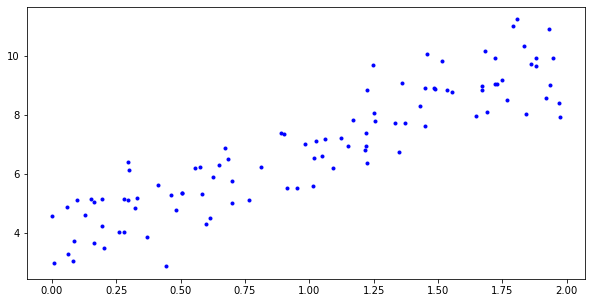

In [2]:
plt.figure(figsize = (10,5))

plt.plot(x, y, 'b.')

plt.show()

In [3]:
x.reshape(-1).shape

(100,)

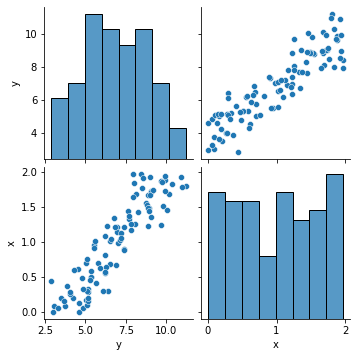

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'y' : y.reshape(-1), 'x' : x.reshape(-1)
}, index = range(0,100))


sns.pairplot(data)
plt.show()

-  정규방정식 적용

In [5]:
x_b = np.c_[np.ones((100,1)), x] #x데이터에 b0을 추가해줌
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) #(t(x)**x)**t(x)**y

In [6]:
theta_best

array([[3.80068519],
       [3.07595546]])

실제로 나와야 하는 값은 y를 만들때 넣은 절편인 4와 기울기인 3! 
하지만 오차항 때문에 정확한 값은 얻지 못했다


In [7]:
np.array([[0], [2]])

array([[0],
       [2]])

In [8]:
np.ones((2,1))

array([[1.],
       [1.]])

- 사이킷런 적용

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1),y)

LinearRegression()

In [10]:
lin_reg.intercept_

array([3.80068519])

## 4.2 Gradient Descent

In [11]:
x.shape

(100, 1)

In [12]:
x.reshape(-1,1).shape

(100, 1)

In [13]:
#경사하강법의 구현

eta = 0.1 #학습률(에타)
n_iterations = 1000
m = 100

#theta를 초기화
theta = np.random.randn(2,1)
print(theta)

#변수저장
beta0 = list()
beta1 = list()

for iteration in range(n_iterations) : 
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    beta0.append(theta[0][0])
    beta1.append(theta[1][0])

[[ 0.17083547]
 [-0.64128614]]


In [14]:
theta[0][0]

3.8006851852873442

In [15]:
#새로운 데이터 생성
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

#파라미터 저장
param = np.array([beta0, beta1])

#행렬곱 생성
sgd_0_1 = x_new_b.dot(param).T


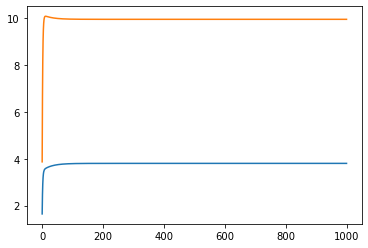

In [16]:
#파라미터가 어디로 수렵하는지 보자
plt.plot(figsize = (10,5))
plt.plot(sgd_0_1)
plt.show()

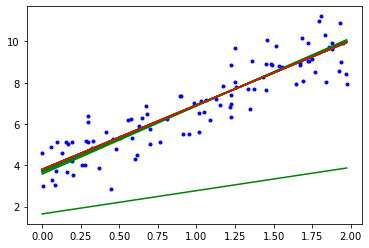

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

#그래프 그리기
plt.plot(figsize = (15,10))
plt.plot(x,y,'b.')
for i in range(0,200,10):
    plt.plot([0,max(x)],sgd_0_1[i],'g-')
    if i == 190 : 
        plt.plot([0,max(x)],sgd_0_1[i],'r-')

위와 같이 천천히 최적의 회귀선으로 다가가게 된다.

###  4.2.2 Stocastic Gradient Descent

> 매 스텝 샘플을 만들고 그 샘플에 대해 그레디언트를 계산한다

> 샘플 = 무작위성 이므로 배치 경사하강법보다 불안정하다

> 사실 딥러닝에서의 배치는 전체가 아니라 일부인데 왜 여기서는 반대로 사용되는지 잘 모르겠다.

> 초반에는 학습률을 크게 늘려 local minima에 빠지지 않게 하고, 이후에는 학습률을 작게 줄여서 global minima를 찾게 한다고 한다! 좋은 아이디어 인듯

In [18]:
n_epochs = 50 #반복 횟수를 의미한다.

t0, t1 = 5, 50 #학습 스케쥴 파라미터...?

m=100

def learning_schedule(t) : 
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs) : 
    for i in range(m) : #100개의 샘플로 진행한다.
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1] #이건 하나의 x를 뽑아주는 과정
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta -eta*gradients
        


In [19]:
theta

array([[3.80752192],
       [3.09687321]])

- 사이킷 런에서도 구동 가능!

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
#tol은 tolerance?로 0.001보다 손실이 적게 줄어들때가지 반복실행하는 것 같다

sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77198449]), array([3.03329573]))

## 4.3 다항회귀

- 간단한 데이터 셋 생성

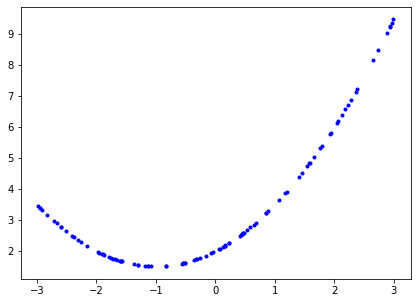

In [22]:
m=100
x = 6*np.random.rand(m,1) -3
y = 0.5*x**2 + x + 2 #+ np.random.randn(m,1) #마지막 항은 약간의 오차항이라고 한다

plt.figure(figsize = (7,5))
plt.plot(x,y,'b.')
plt.show()

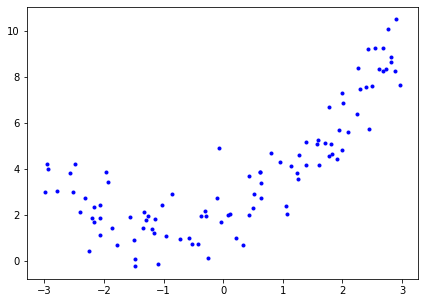

In [23]:
m=100
x = 6*np.random.rand(m,1) -3
y = 0.5*x**2 + x + 2 + np.random.randn(m,1) #마지막 항은 약간의 오차항이라고 한다

plt.figure(figsize = (7,5))
plt.plot(x,y,'b.')
plt.show()

확실히 오차항을 추가하니 차이가 존재한다.

- PolynomialFeatures 이용

In [24]:
from sklearn.preprocessing import PolynomialFeatures

#include bias를 사용하면 x0 = 1인 항이 추가된다.
poly_features=PolynomialFeatures(degree = 2, include_bias = False)

x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0]) #그 제곱값이 함께 들어가는 것 같다.

[2.44920935]
[2.44920935 5.99862646]


변수가 a,b이고 degree = 3으로 설정하게 될 경우 $$ ab, ab^2, a^2b$$도 추가된다고 한다

## 4.4 학습곡선

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y) : 
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(x_train)) : 
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize = (10,5))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label = 'validation set')
    plt.ylabel('RMSE')
    plt.legend()

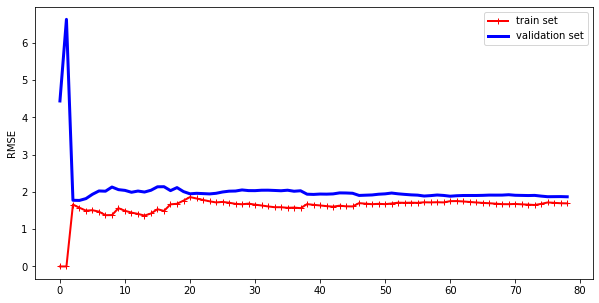

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

이제는 10차 다항식을 그려본다고 한다

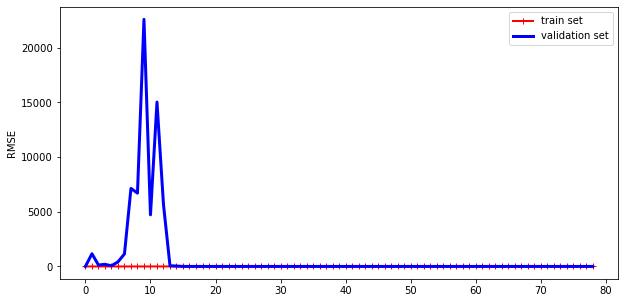

In [27]:
from sklearn.pipeline import Pipeline

#Pipeline에서 기억할 것은
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)
#근데 이렇게 하니까 이상하게 되는데,,,

## 4.5 규제가 있는 선형모델 

### 4.5.1 Ridge Regression

- 일반 릿지 사용

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[5.32046499]])

In [29]:
sgd_reg = SGDRegressor(penalty = 'l2') #아마 l1으로 넣으면 라쏘겠지?
sgd_reg.fit(x,y)
sgd_reg.predict([[1.5]])

array([5.29501935])

### 4.5.2 Lasso Regression

- sklearn.linear_model에서 바로 적용하는 방식

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])  

array([5.28444091])

- SGDRegressor을 활용해서 사용할 수 있다고 한다. 값은 거의 비슷하게 나오는 듯

In [31]:
lasso_sgd = SGDRegressor(penalty='l1', alpha = 0.1)
lasso_sgd.fit(x,y)
lasso_sgd.predict([[1.5]])

array([5.28468737])

### 4.5.3 Elastic net

하는 방법만이라도 알아보자

$$      1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2$$
        
이다. 
따라서 alpha는 규제항 자체에 대한 가중치이고, l1_ratio는 라쏘를 얼마나 쓸지를 알려주는 것이다.

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.9)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.28404875])

In [33]:
#실험적으로 그래프를 그려보자.
alpha, l1, pred =[], [], []
param_range = np.arange(0.0 ,1.0 ,0.1)

for i in param_range : 
    for j in param_range : 
        elastic_net = ElasticNet(alpha = i, l1_ratio = j)
        elastic_net.fit(x,y)
        pred.append(elastic_net.predict([[1.5]]))
        alpha.append(i)
        l1.append(j)
        
        

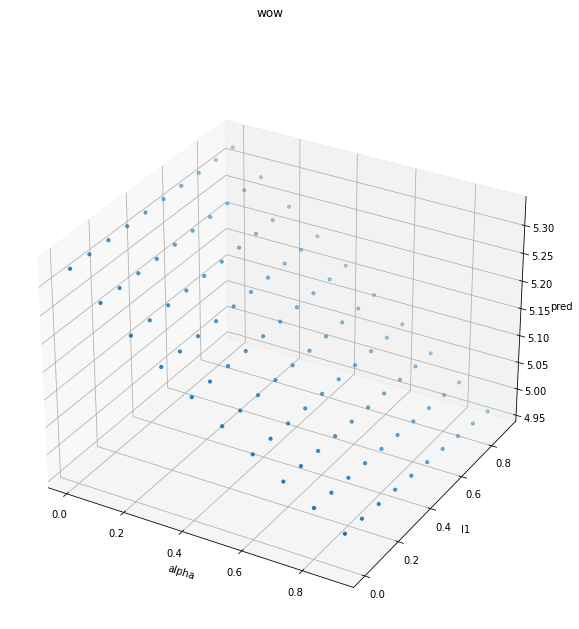

In [34]:
#그래프 그리기
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))

ax = fig.gca(projection = '3d')

ax.scatter(alpha, l1, pred, s = 10)
ax.set_xlabel('alpha')
ax.set_ylabel('l1')
ax.set_zlabel('pred')
plt.suptitle('wow')
plt.show()

### 4.5.4 Early stopping

훈련을 거듭함(epoch를 증가시킴에 따라)에 따라 train error는 지속적으로 감소하지만, validation error는 일정구간 감소하다가 증가하게 된다. 이는 지나치게 train set에 적합되어, 새로운 데이터인 validation data가 들어왔을 때 좋은 성능을 내지 못하는 과적합의 문제가 발생했음을 의미한다.

이를 해소하기 위해 조기 종료의 방식을 적용한다

- 책에서 제시한 조기종료 기본 구현 코드 - DO NOT RUN

In [35]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#data setting
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.fit_transform(x_val)

sgd_reg = SGDRegressor(max_iter = 1, 
                      tol = -np.infty,
                      warm_start = True, #fit()메서드가 호출될 때 처음부터 다시 시작이 아니라 이전 모델 파라미터에서 훈련을 계속한다.
                      penalty= None,
                      learning_rate='constant',
                      eta0 = 0.0005)

minimun_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000) : 
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < mininum_val_error : 
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'x_train' is not defined

## 4.6 Logistic Regression 

### 4.6.3 결정 경계

- iris data 준비

In [36]:
#iris data

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

x = iris['data'][:, 3:] #petal width(cm) - 꽃잎의 너비라고 함
y = (iris['target'] == 2).astype(np.int) #virginica면 1, 아니면 0

- 로지스틱 모형 훈련

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


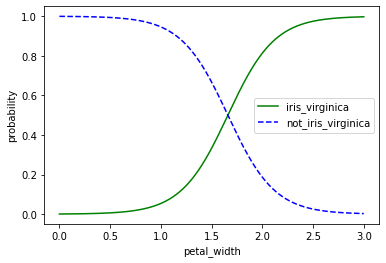

In [46]:
x_new = np.linspace(0,3,1000).reshape(-1,1) #0부터 3까지 1000개의 값을 만든다


y_proba = log_reg.predict_proba(x_new)

print(y_proba)

#그래프 구축
plt.plot(x_new, y_proba[:, 1], 'g-', label = 'iris_virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', label = 'not_iris_virginica')
plt.ylabel('probability')
plt.xlabel('petal_width')
plt.legend()
plt.show()

predict_proba는 뭘까?

아마 y_prob[:,1]은 해당 데이터를 1로 예측할 확률이고 [:,0]은 그 반대일 것 같다.


In [58]:
print('1.7의 값을 넣었을때 뭐라고 예측할 것인가? {0}'.format(log_reg.predict([[1.7]])))
print('1.7이 1로 예측될 확률 : {0}'.format(log_reg.predict_proba([[1.7]])[:,1]))

1.7의 값을 넣었을때 뭐라고 예측할 것인가? [1]
1.7이 1로 예측될 확률 : [0.54277903]


뭔가 이 예시를 보니, 임계값은 기본으로 0.5로 들어가 있어서 위와 같이 예측하는 것 같다

### 4.6.4 Softmax Regression

In [61]:
#데이터 준비
x = iris['data'][:, (2,3)] #꽃잎 길이와 꽃잎 너비
y = iris['target']

#모델 적합
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10) 

#C는 서포트벡터 머신의 파라미터와 비슷, l2규제라고 한다(릿지). 작을수록 강한 규제
#(Currently the 'multinomial' option is supported only by the 'lbfgs','sag', 'saga' and 'newton-cg' solvers.)

softmax_reg.fit(x,y)

#새로운 값 예측
softmax_reg.predict([[5,2]])


array([2])

In [62]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

94.2%의 확률로 class : 2 (virginica)로 예측할 것이다 